# Path Planning with A* Search Algorithm

This notebook demonstrates the A* search algorithm for finding optimal paths through grid environments. We'll visualize how A* efficiently navigates through obstacles to find the shortest path from a start position to a goal position.

## 1. Setup

First, let's import the necessary libraries and set up our environment.

In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import clear_output, HTML, display
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation

# Add the project root to the Python path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import project modules
from src.planning.a_star import a_star_search, bidirectional_a_star, manhattan_distance
from src.environments.navigation_env import NavigationEnv
from src.visualization.env_visualizer import visualize_path, visualize_trajectory
from src.grid_conversion.converter import depth_to_grid

## 2. Creating Grid Environments

Let's create some grid environments to test our path planning algorithms. We'll create:
1. A simple grid with a vertical wall
2. A more complex maze-like grid
3. A grid generated from a depth map (if available)

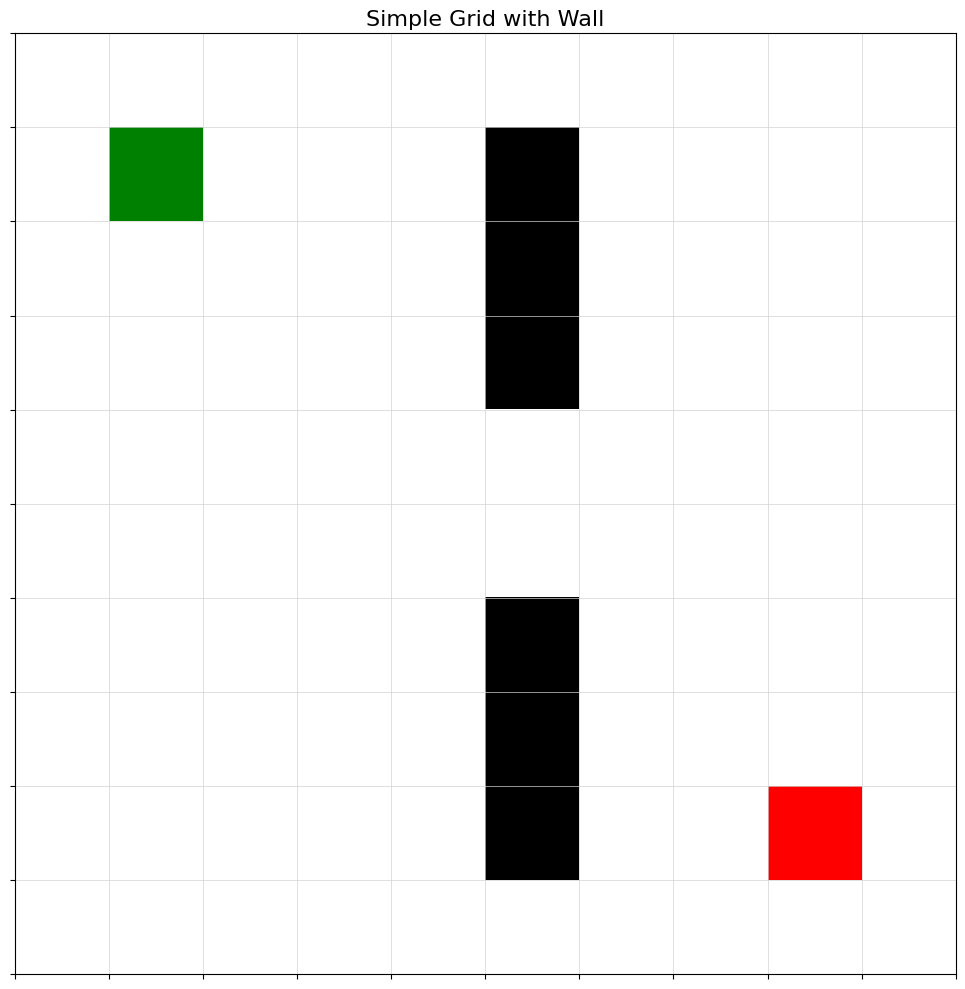

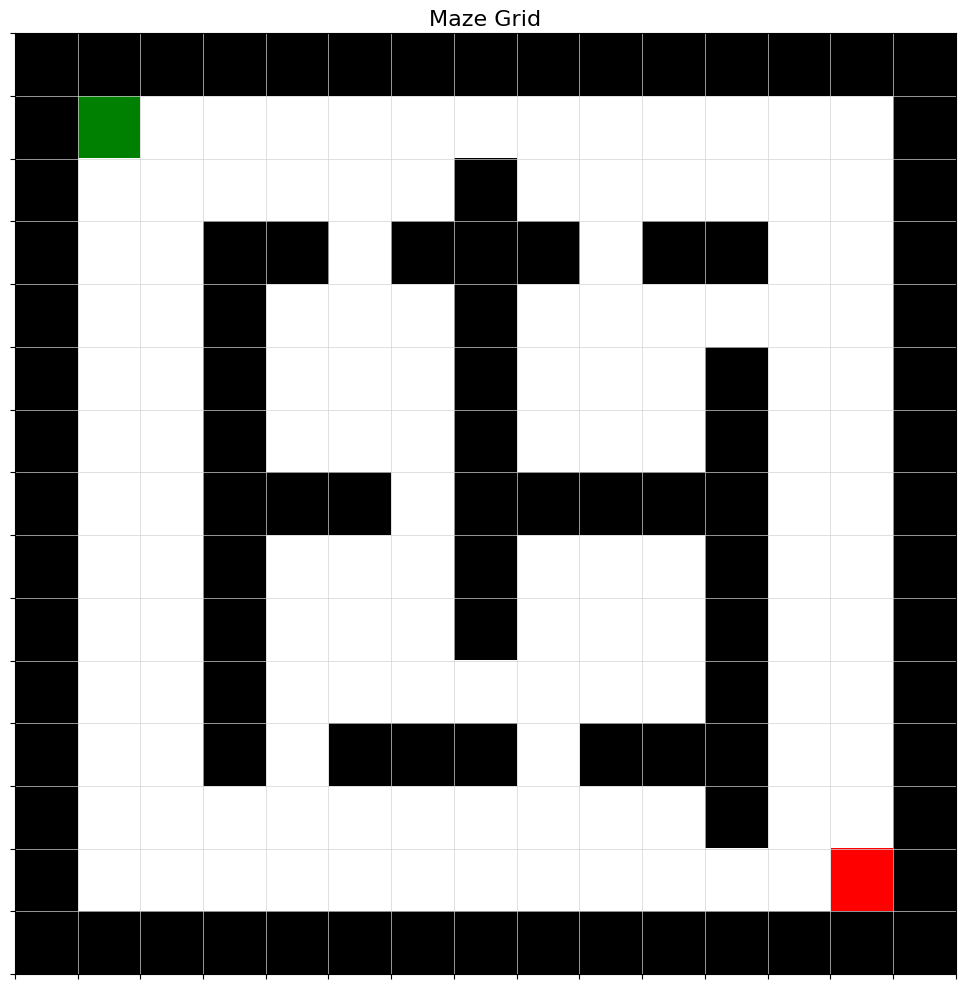

In [2]:
def create_simple_grid(size=10):
    """Create a simple grid with a vertical wall in the middle."""
    grid = np.zeros((size, size), dtype=np.int8)
    
    # Add a vertical wall in the middle with a small gap
    middle = size // 2
    grid[1:middle-1, middle] = 1
    grid[middle+1:size-1, middle] = 1
    
    return grid

def create_maze_grid(size=15):
    """Create a more complex maze-like grid."""
    grid = np.zeros((size, size), dtype=np.int8)
    
    # Add walls around the edges
    grid[0, :] = 1
    grid[-1, :] = 1
    grid[:, 0] = 1
    grid[:, -1] = 1
    
    # Add some vertical walls
    grid[3:size-3, 3] = 1
    grid[2:size-5, 7] = 1
    grid[5:size-2, 11] = 1
    
    # Add some horizontal walls
    grid[3, 3:size-3] = 1
    grid[7, 3:size-3] = 1
    grid[11, 3:size-3] = 1
    
    # Create some gaps in the walls for paths
    grid[3, 5] = 0
    grid[3, 9] = 0
    grid[7, 6] = 0
    grid[7, 12] = 0
    grid[11, 4] = 0
    grid[11, 8] = 0
    
    # Make sure start and goal positions are clear
    grid[1, 1] = 0  # Start
    grid[size-2, size-2] = 0  # Goal
    
    return grid

def visualize_grid(grid, start=None, goal=None, path=None, title="Grid Environment"):
    """Visualize a grid with optional start, goal and path."""
    # Create a copy of the grid for visualization
    vis_grid = grid.copy()
    
    # Mark start and goal positions if provided
    if start is not None:
        vis_grid[start] = 2  # Start position
    if goal is not None:
        vis_grid[goal] = 3  # Goal position
    
    # Create a figure
    plt.figure(figsize=(10, 10))
    
    # Create a custom colormap
    colors = ["white", "black", "green", "red"]
    cmap = ListedColormap(colors)
    
    # Display the grid
    plt.imshow(vis_grid, cmap=cmap, vmin=0, vmax=3)
    plt.title(title, fontsize=16)
    
    # Add grid lines
    plt.grid(True, which='both', color='lightgrey', linewidth=0.5)
    plt.xticks(np.arange(-0.5, grid.shape[1], 1), [])
    plt.yticks(np.arange(-0.5, grid.shape[0], 1), [])
    
    # Plot the path if provided
    if path:
        path_y, path_x = zip(*path)
        plt.plot(path_x, path_y, 'b-', linewidth=3, alpha=0.7)
        plt.plot(path_x, path_y, 'bo', markersize=8, alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Create our grid environments
simple_grid = create_simple_grid(10)
maze_grid = create_maze_grid(15)

# Define start and goal positions
simple_start = (1, 1)
simple_goal = (8, 8)

maze_start = (1, 1)
maze_goal = (13, 13)

# Visualize the grids
visualize_grid(simple_grid, simple_start, simple_goal, title="Simple Grid with Wall")
visualize_grid(maze_grid, maze_start, maze_goal, title="Maze Grid")

## 3. Basic A* Search

Now, let's run the A* search algorithm on our simple grid and visualize the path.

Running A* search on simple grid...
A* search completed in 0.000000 seconds
Path length: 15
Nodes explored: 49
Path cost: 14.0


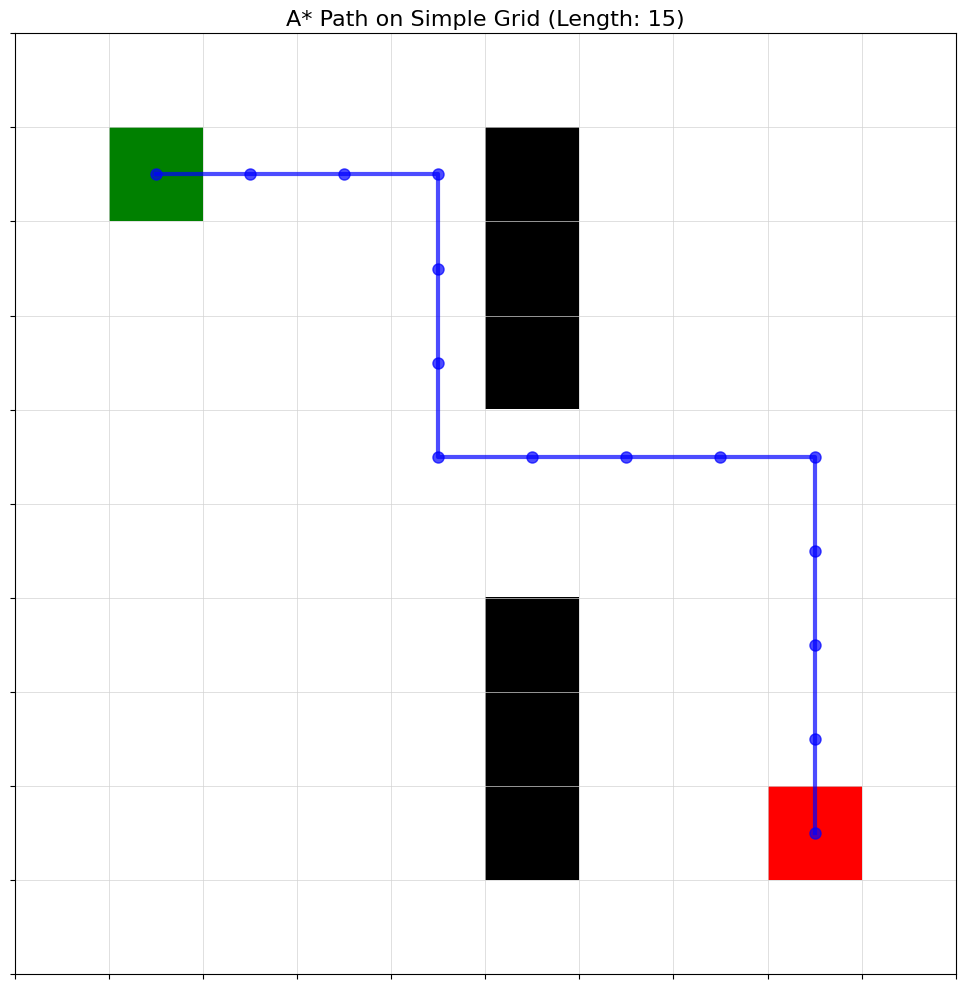

In [3]:
# Run A* search on the simple grid
print("Running A* search on simple grid...")
start_time = time.time()
simple_path, simple_metrics = a_star_search(
    grid=simple_grid, 
    start=simple_start, 
    goal=simple_goal,
    heuristic="manhattan"
)
print(f"A* search completed in {simple_metrics['time_taken']:.6f} seconds")
print(f"Path length: {len(simple_path)}")
print(f"Nodes explored: {simple_metrics['nodes_explored']}")
print(f"Path cost: {simple_metrics['path_cost']}")

# Visualize the path
visualize_grid(simple_grid, simple_start, simple_goal, simple_path, 
              title=f"A* Path on Simple Grid (Length: {len(simple_path)})")

## 4. A* Search on More Complex Maze

Let's run A* on our more complex maze-like grid.

Running A* search on maze grid...
A* search completed in 0.007003 seconds
Path length: 25
Nodes explored: 110
Path cost: 24.0


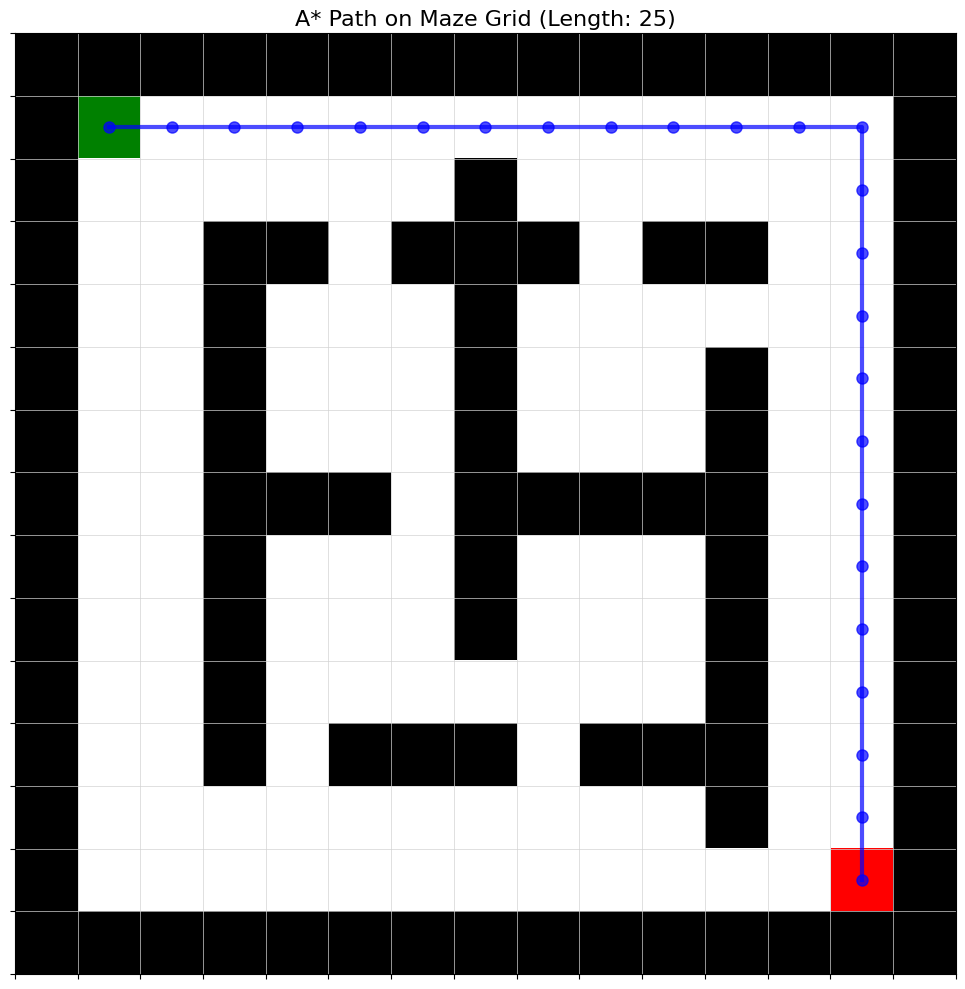

In [4]:
# Run A* search on the maze grid
print("Running A* search on maze grid...")
start_time = time.time()
maze_path, maze_metrics = a_star_search(
    grid=maze_grid, 
    start=maze_start, 
    goal=maze_goal,
    heuristic="manhattan"
)
print(f"A* search completed in {maze_metrics['time_taken']:.6f} seconds")
print(f"Path length: {len(maze_path)}")
print(f"Nodes explored: {maze_metrics['nodes_explored']}")
print(f"Path cost: {maze_metrics['path_cost']}")

# Visualize the path
visualize_grid(maze_grid, maze_start, maze_goal, maze_path, 
              title=f"A* Path on Maze Grid (Length: {len(maze_path)})")

## 5. Comparing Different Heuristics

Let's compare the performance of different heuristics (Manhattan, Euclidean, Chebyshev) on the maze grid.

Running A* search with manhattan heuristic...
Search completed in 0.000000 seconds
Path length: 25
Nodes explored: 110
Path cost: 24.0
---


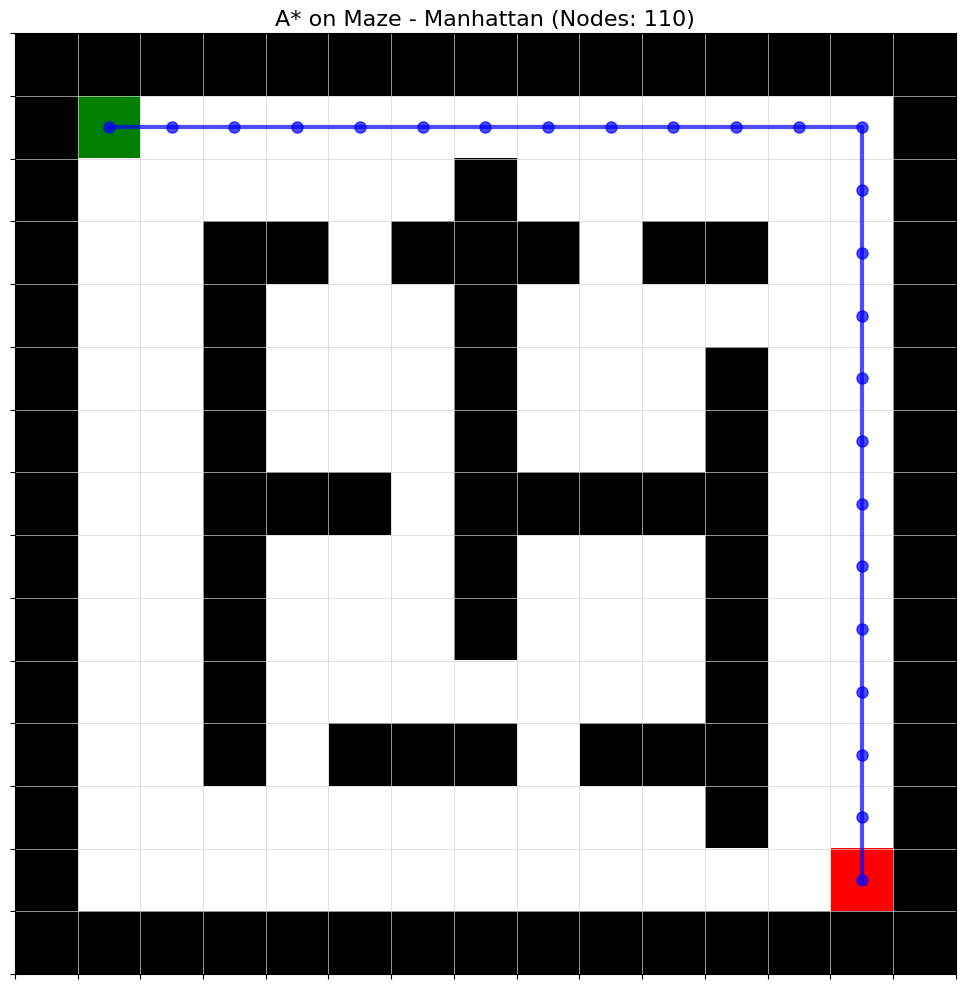

Running A* search with euclidean heuristic...
Search completed in 0.000000 seconds
Path length: 25
Nodes explored: 122
Path cost: 24.0
---


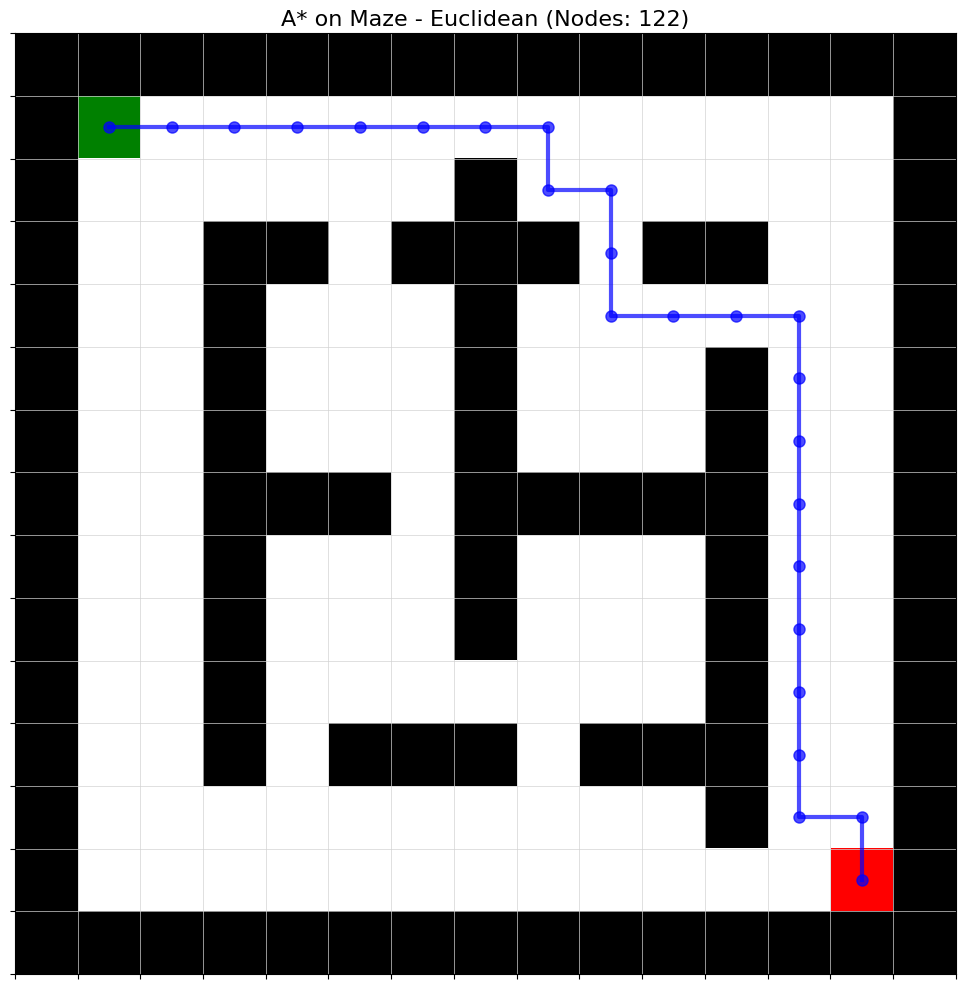

Running A* search with chebyshev heuristic...
Search completed in 0.000000 seconds
Path length: 25
Nodes explored: 127
Path cost: 24.0
---


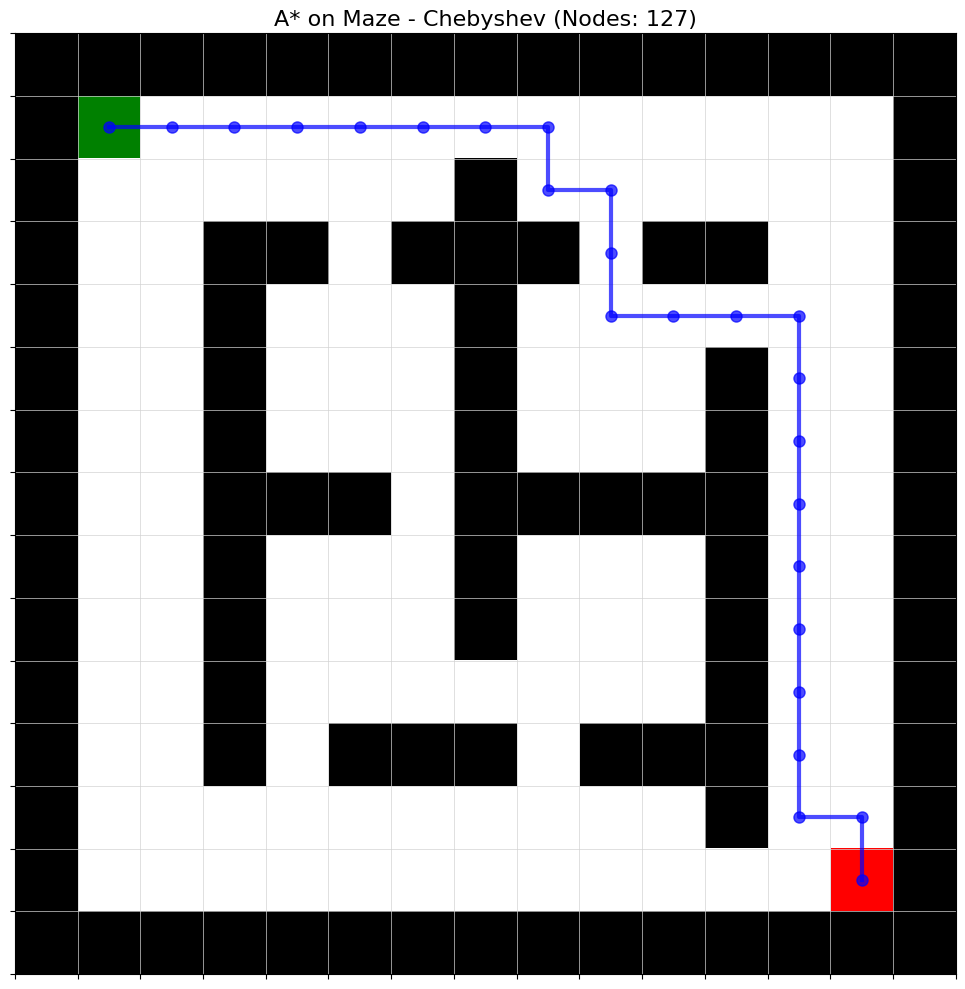

In [5]:
def run_and_visualize_a_star(grid, start, goal, heuristic, title_prefix="A* Search"):
    """Run A* search with a specific heuristic and visualize the results."""
    print(f"Running A* search with {heuristic} heuristic...")
    start_time = time.time()
    path, metrics = a_star_search(
        grid=grid, 
        start=start, 
        goal=goal,
        heuristic=heuristic
    )
    print(f"Search completed in {metrics['time_taken']:.6f} seconds")
    print(f"Path length: {len(path)}")
    print(f"Nodes explored: {metrics['nodes_explored']}")
    print(f"Path cost: {metrics['path_cost']}")
    print("---")
    
    # Visualize the path
    visualize_grid(grid, start, goal, path, 
                  title=f"{title_prefix} - {heuristic.capitalize()} (Nodes: {metrics['nodes_explored']})")
    
    return path, metrics

# Run A* with different heuristics
manhattan_path, manhattan_metrics = run_and_visualize_a_star(
    maze_grid, maze_start, maze_goal, "manhattan", "A* on Maze"
)

euclidean_path, euclidean_metrics = run_and_visualize_a_star(
    maze_grid, maze_start, maze_goal, "euclidean", "A* on Maze"
)

chebyshev_path, chebyshev_metrics = run_and_visualize_a_star(
    maze_grid, maze_start, maze_goal, "chebyshev", "A* on Maze"
)

## 6. Comparing A* with Bidirectional A*

Let's compare the performance of standard A* and bidirectional A* search.

Running bidirectional A* search...
Bidirectional A* search completed in 0.000000 seconds
Path length: 25
Nodes explored: 26
Path cost: 24.0


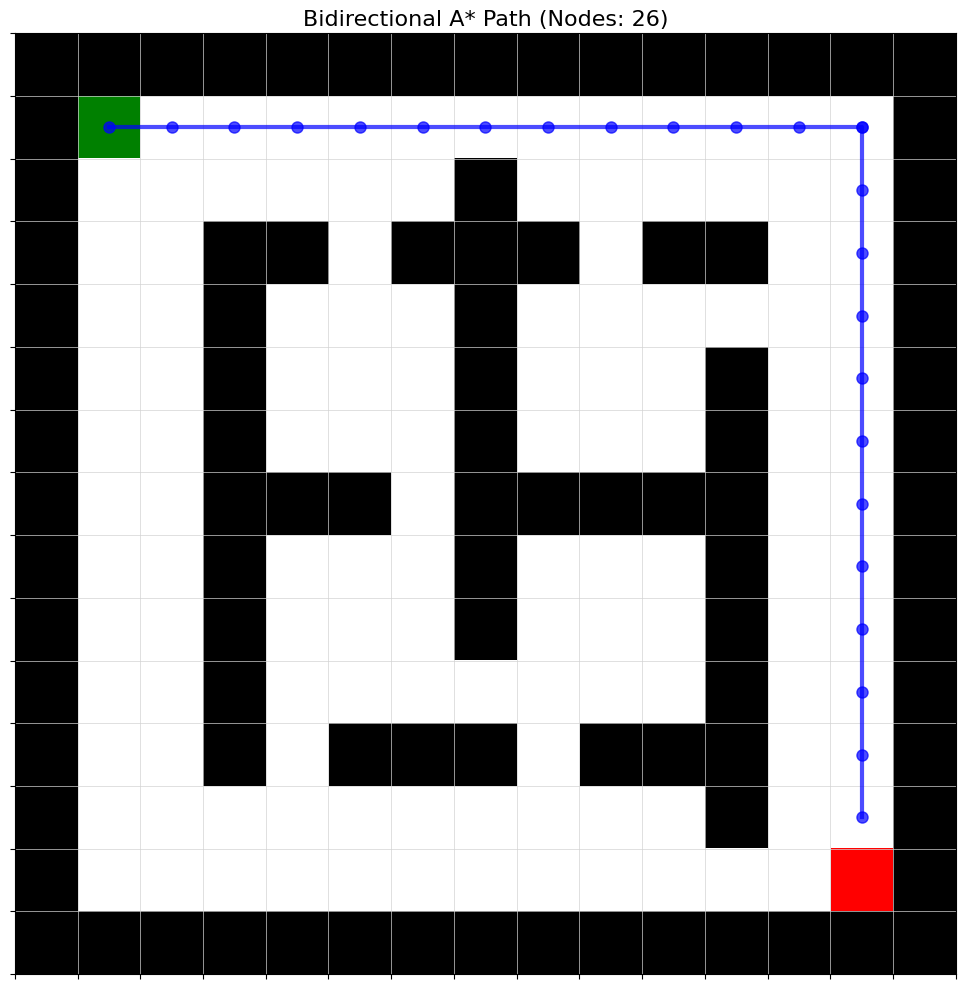


Comparison with standard A*:
Standard A* nodes explored: 110
Bidirectional A* nodes explored: 26
Efficiency gain: 4.23x
Standard A* time: 0.000000 seconds
Bidirectional A* time: 0.000000 seconds


ZeroDivisionError: float division by zero

In [6]:
print("Running bidirectional A* search...")
start_time = time.time()
bidir_path, bidir_metrics = bidirectional_a_star(
    grid=maze_grid, 
    start=maze_start, 
    goal=maze_goal,
    heuristic="manhattan"
)
print(f"Bidirectional A* search completed in {bidir_metrics['time_taken']:.6f} seconds")
print(f"Path length: {len(bidir_path)}")
print(f"Nodes explored: {bidir_metrics['nodes_explored']}")
print(f"Path cost: {bidir_metrics['path_cost']}")

# Visualize the path
visualize_grid(maze_grid, maze_start, maze_goal, bidir_path, 
              title=f"Bidirectional A* Path (Nodes: {bidir_metrics['nodes_explored']})")

# Compare with standard A*
print("\nComparison with standard A*:")
print(f"Standard A* nodes explored: {manhattan_metrics['nodes_explored']}")
print(f"Bidirectional A* nodes explored: {bidir_metrics['nodes_explored']}")
print(f"Efficiency gain: {manhattan_metrics['nodes_explored'] / bidir_metrics['nodes_explored']:.2f}x")
print(f"Standard A* time: {manhattan_metrics['time_taken']:.6f} seconds")
print(f"Bidirectional A* time: {bidir_metrics['time_taken']:.6f} seconds")
print(f"Time improvement: {manhattan_metrics['time_taken'] / bidir_metrics['time_taken']:.2f}x")

## 7. Visualizing A* Search Process

Let's visualize the A* search process step-by-step to see how it explores the grid.

2025-05-08 17:11:47,672 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

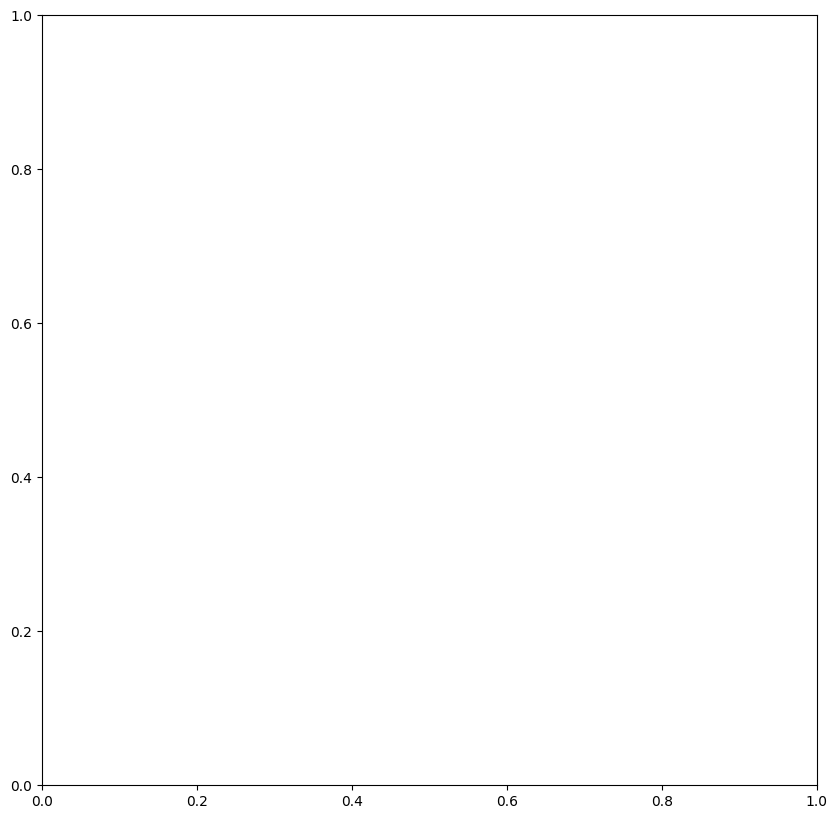

In [7]:
def visualize_search_process(grid, start, goal, max_steps=100):
    """Visualize the A* search process step by step."""
    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Colors for visualization
    FREE_SPACE = 0
    OBSTACLE = 1
    START = 2
    GOAL = 3
    OPEN_SET = 4
    CLOSED_SET = 5
    CURRENT = 6
    PATH = 7
    
    # Custom colormap
    colors = ["white", "black", "green", "red", "lightblue", "lightgray", "yellow", "blue"]
    cmap = ListedColormap(colors)
    
    # Initialize visualization grid
    vis_grid = grid.copy()
    vis_grid[start] = START
    vis_grid[goal] = GOAL
    
    # Initialize A* algorithm data structures
    import heapq
    open_set = [(0, start)]  # Priority queue (f_score, position)
    heapq.heapify(open_set)
    closed_set = set()
    
    g_score = {start: 0}  # Cost from start to current position
    f_score = {start: manhattan_distance(start, goal)}  # Estimated total cost
    
    came_from = {}  # To reconstruct the path
    
    # For animation
    frames = []
    step = 0
    path_found = False
    
    # A* search loop
    while open_set and step < max_steps and not path_found:
        # Get position with lowest f_score
        current_f, current = heapq.heappop(open_set)
        
        # Check if we've reached the goal
        if current == goal:
            path_found = True
            # Reconstruct path
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            
            # Mark path in visualization grid
            for pos in path:
                if pos != start and pos != goal:
                    vis_grid[pos] = PATH
        
        # Skip if already processed
        if current in closed_set:
            continue
        
        # Mark current position
        if current != start and current != goal:
            vis_grid[current] = CURRENT
        
        # Add to closed set
        closed_set.add(current)
        
        # Update visualization for closed set
        for pos in closed_set:
            if pos != start and pos != goal and pos != current and vis_grid[pos] != PATH:
                vis_grid[pos] = CLOSED_SET
        
        # Get neighbors
        neighbors = []
        row, col = current
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        
        for dr, dc in directions:
            r, c = row + dr, col + dc
            if 0 <= r < grid.shape[0] and 0 <= c < grid.shape[1] and grid[r, c] == FREE_SPACE:
                neighbors.append((r, c))
        
        # Process neighbors
        for neighbor in neighbors:
            if neighbor in closed_set:
                continue
            
            # Calculate tentative g_score
            tentative_g = g_score[current] + 1
            
            # If this path is better than previous
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + manhattan_distance(neighbor, goal)
                
                # Add to open set if not already there
                if neighbor not in [pos for _, pos in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
                    if neighbor != goal:
                        vis_grid[neighbor] = OPEN_SET
        
        # Create a copy of the visualization grid for this step
        frame = vis_grid.copy()
        frames.append(frame)
        step += 1
    
    # Create animation
    fig, ax = plt.subplots(figsize=(10, 10))
    img = ax.imshow(frames[0], cmap=cmap, vmin=0, vmax=7)
    
    # Add grid lines
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), [])
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), [])
    
    # Add a legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='white', edgecolor='black', label='Free Space'),
        Patch(facecolor='black', edgecolor='black', label='Obstacle'),
        Patch(facecolor='green', edgecolor='black', label='Start'),
        Patch(facecolor='red', edgecolor='black', label='Goal'),
        Patch(facecolor='lightblue', edgecolor='black', label='Open Set'),
        Patch(facecolor='lightgray', edgecolor='black', label='Closed Set'),
        Patch(facecolor='yellow', edgecolor='black', label='Current Node'),
        Patch(facecolor='blue', edgecolor='black', label='Path')
    ]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), 
              ncol=4, fontsize=10)
    
    plt.tight_layout()
    
    # Animation update function
    def update(frame):
        img.set_array(frame)
        title = f"A* Search Process - Step {frames.index(frame) + 1}"
        ax.set_title(title, fontsize=16)
        return img,
    
    # Create animation
    anim = animation.FuncAnimation(fig, update, frames=frames, interval=500, blit=False)
    plt.close()  # Prevent duplicate display
    
    return HTML(anim.to_jshtml())

# Create a smaller grid for visualization
vis_grid = create_simple_grid(12)
vis_start = (1, 1)
vis_goal = (10, 10)

# Visualize the search process
search_animation = visualize_search_process(vis_grid, vis_start, vis_goal, max_steps=50)
display(search_animation)

## 8. Integration with Navigation Environment

Now, let's see how we can use the A* algorithm with our NavigationEnv class to create an agent that can navigate to the goal using the optimal path.

In [ ]:
# Create a navigation environment with our maze grid
env = NavigationEnv(
    grid=maze_grid,
    start_pos=maze_start,
    goal_pos=maze_goal,
    render_mode="rgb_array"
)

# Find the optimal path using A*
path, metrics = a_star_search(
    grid=maze_grid,
    start=maze_start,
    goal=maze_goal
)

print(f"Found path with length {len(path)}")
print(f"Nodes explored: {metrics['nodes_explored']}")

# Convert path to actions
def path_to_actions(path):
    """Convert a path to a sequence of actions for the NavigationEnv."""
    actions = []
    for i in range(1, len(path)):
        prev_row, prev_col = path[i-1]
        curr_row, curr_col = path[i]
        
        # Determine action (0: up, 1: right, 2: down, 3: left)
        if curr_row < prev_row:  # Moving up
            actions.append(0)
        elif curr_col > prev_col:  # Moving right
            actions.append(1)
        elif curr_row > prev_row:  # Moving down
            actions.append(2)
        elif curr_col < prev_col:  # Moving left
            actions.append(3)
            
    return actions

# Get actions from path
actions = path_to_actions(path)
print(f"Generated {len(actions)} actions from path")

# Execute the actions in the environment
observation, info = env.reset()
frames = [env.render()]

total_reward = 0
for step, action in enumerate(actions):
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    frames.append(env.render())
    
    if terminated or truncated:
        print(f"Episode finished after {step + 1} steps")
        break

print(f"Total reward: {total_reward}")

# Create an animation of the agent following the path
fig, ax = plt.subplots(figsize=(8, 8))
img = ax.imshow(frames[0])
plt.tight_layout()

def update(frame):
    img.set_array(frame)
    return img,

anim = animation.FuncAnimation(fig, update, frames=frames, interval=300, blit=True)
plt.close()

display(HTML(anim.to_jshtml()))

# Visualize the trajectory using our visualization module
visualize_trajectory(env, path, title="A* Optimal Path in Navigation Environment")

## 9. Path Planning on Depth-Generated Grid

If we have a depth map available, let's convert it to a grid and run path planning on it.

In [ ]:
# Check if we have a depth map file
depth_file = project_root / "data" / "sample_depth.npy"

if depth_file.exists():
    # Load the depth map
    depth_map = np.load(depth_file)
    print(f"Loaded depth map with shape {depth_map.shape}")
    
    # Normalize for visualization
    depth_viz = depth_map.copy()
    depth_viz = (depth_viz - depth_viz.min()) / (depth_viz.max() - depth_viz.min())
    
    # Display the depth map
    plt.figure(figsize=(8, 8))
    plt.imshow(depth_viz, cmap='plasma')
    plt.colorbar(label='Normalized Depth')
    plt.title('Depth Map')
    plt.show()
    
    # Convert depth map to grid
    grid_size = 20
    depth_grid = depth_to_grid(
        depth_map=depth_map,
        grid_size=grid_size,
        threshold_factor=0.6,
        smoothing=True,
        kernel_size=3
    )
    
    # Define start and goal positions
    depth_start = (1, 1)
    depth_goal = (grid_size-2, grid_size-2)
    
    # Visualize the grid
    visualize_grid(depth_grid, depth_start, depth_goal, title="Grid Generated from Depth Map")
    
    # Run A* search
    print("Running A* search on depth-generated grid...")
    depth_path, depth_metrics = a_star_search(
        grid=depth_grid,
        start=depth_start,
        goal=depth_goal,
        heuristic="manhattan"
    )
    
    if depth_path:
        print(f"Found path with length {len(depth_path)}")
        print(f"Nodes explored: {depth_metrics['nodes_explored']}")
        print(f"Path cost: {depth_metrics['path_cost']}")
        
        # Visualize the path
        visualize_grid(depth_grid, depth_start, depth_goal, depth_path, 
                       title=f"A* Path on Depth-Generated Grid (Length: {len(depth_path)})")
    else:
        print("No path found on depth-generated grid")
else:
    print("No depth map file found. Skipping this section.")

## 10. Conclusion

In this notebook, we've explored the A* search algorithm for path planning in grid environments. We've seen how A*:

1. Efficiently finds the optimal path between start and goal positions
2. Avoids obstacles and navigates through complex environments
3. Can be used with different heuristics to balance efficiency and optimality
4. Can be extended to bidirectional search for improved performance
5. Integrates with our navigation environment for agent control

A* is a foundational algorithm in path planning and forms the basis for many more advanced approaches. The paths generated by A* can be used to guide reinforcement learning agents or control robotic systems in complex environments.